# Boston

ランダムフォレストは，分類や回帰の問題に対して，各特徴量の重要度を求めることができる．

ここではボストンの住宅価格データを対象に，ランダムフォレストを適用する．

Bostonデータセットの詳細は以下になっている．

|ラベル|意味|
|-|-|
|CRIM|街の一人当たりの犯罪発生率|
|ZN|25,000平方フィート以上の住居区画の占める割合|
|INDUS|小売業以外の商業が占める面積の割合|
|CHAS|チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)|
|NOX|一酸化炭素濃度(単位は10ppm)|
|RM|住居当たりの平均部屋数|
|AGE|1940年以前より住居を所有している者の割合|
|DIS|ボストン内5箇所のビジネスセンターまでの重み付け距離|
|RAD|環状高速道路へのアクセスしやすさ|
|TAX|\$10,000ドルあたりの不動産税率の総計|
|PTRATIO|街の小学校教師の割合|
|B|町毎の黒人(Bk)の比率|
|LSTAT|人口に占める低所得者層の割合|
|MEDV|持家価格の中央値(単位:千ドル)|

教師信号はMEDVである．

In [17]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt

data = skd.load_boston()

In [18]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [19]:
data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [20]:
# ランダムフォレスト
reg = ske.RandomForestRegressor(n_estimators=10)

X = data['data']
y = data['target']

reg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [21]:
# 特徴の重要度
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

(0, 13)

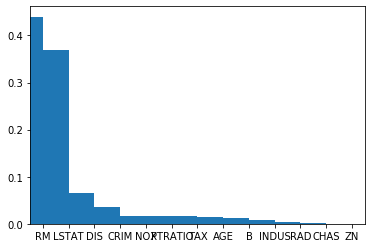

In [24]:
# 特徴の重要度に従い，ヒストグラムを作成する．
ax = plt.subplot(111)
plt.bar(np.arange(len(fet_imp)), fet_imp, width=1, lw=2)
plt.grid(False)
ax.set_xticks(np.arange(len(fet_imp))+0.5)
ax.set_xticklabels(data['feature_names'][fet_ind])
plt.xlim(0, len(fet_imp))

In [27]:
data['feature_names'][fet_ind]

array(['RM', 'LSTAT', 'DIS', 'CRIM', 'NOX', 'PTRATIO', 'TAX', 'AGE', 'B',
       'INDUS', 'RAD', 'CHAS', 'ZN'], dtype='<U7')

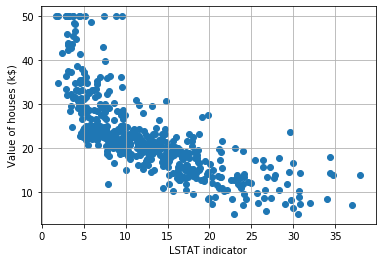

In [23]:
plt.scatter(X[:,-1], y)
plt.xlabel('LSTAT indicator')
plt.ylabel('Value of houses (k$)')
plt.grid(True)